# Machine Learning Final Project Template

This is the template for the final project of the course.

Form groups of 3 people, take this template and add your code to it. Choose one of the team member's GitHub and upload it there, so that you can all collaborate.

## 1. Imports and Setup

In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning (you will probably need to add more)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, mean_squared_error

## 2. Load the Data



#### **Wine quality - Classification**

**Dataset's description**

*Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests*.

*These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.*

*You are provided the physicochemical characteristics of the wine. You must predict the sensory perception (quality) of it (1 - 10).*

**It could be seen as a regression or a classification. We recommend to choose the other dataset if you want to perform regression, but you are welcome to attack this problem from a regression perspective too.**

Original documentation: https://archive.ics.uci.edu/dataset/186/wine+quality

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# Put them together in a single dataframe
wine_quality_df = pd.concat([X, y], axis=1)

In [4]:
print(X.shape)

print(y.shape)

print(wine_quality_df.shape)

(6497, 11)
(6497, 1)
(6497, 12)


Choose one of them.

Now:
- Divide your data in the training and test sets. Remember, the EDA is only done with the training set. Use a specific seed (so it is replicable each time you execute). Leave test set aside until the end of the project.
- Since we are going to do cross-validation, it is not necessary to divide the train set on validation and train.

In [5]:
# Your code goes here

from sklearn.model_selection import train_test_split

#eda only on the training?
train_set, test_set = train_test_split(wine_quality_df, test_size=0.2, random_state=42, stratify=wine_quality_df['quality'])
#20% train I guess

train_set.shape

(5197, 12)

## 3. Exploratory Data Analysis

### 3.1. Initial exploration

- See the columns of your data
- View basic statistics
- Check for missing values
- Visualize distributions, relationships and correlations between attributes/columns.

In [6]:
# Your code goes here

train_set.head()

# df.info()
# df.describe()
# df.isna().sum()
# corr_matrix = ...
# Plot histograms
# ...

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4760,6.1,0.17,0.42,15.1,0.033,28.0,124.0,0.99684,2.87,0.47,9.5,5
4165,6.9,0.21,0.24,1.8,0.021,17.0,80.0,0.98992,3.15,0.46,12.3,7
2530,6.4,0.26,0.43,12.6,0.033,64.0,230.0,0.99740,3.08,0.38,8.9,5
3078,7.7,0.16,0.49,2.0,0.056,20.0,124.0,0.99480,3.32,0.49,10.7,6
5736,7.4,0.31,0.26,8.6,0.048,47.0,206.0,0.99640,3.26,0.36,9.1,5


In [7]:
train_set.info()
#no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 4760 to 6420
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5197 non-null   float64
 1   volatile_acidity      5197 non-null   float64
 2   citric_acid           5197 non-null   float64
 3   residual_sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free_sulfur_dioxide   5197 non-null   float64
 6   total_sulfur_dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 527.8 KB


In [8]:
train_set.describe()
#citric acid has 0 values -> we deduce it's missing data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.220906,0.339995,0.318164,5.475861,0.055963,30.547912,115.964018,0.994741,3.218742,0.531728,10.475463,5.818164
std,1.286161,0.165761,0.146470,4.785528,0.034500,17.647040,56.738370,0.003011,0.160710,0.146772,1.188869,0.873126
min,4.200000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987130,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,78.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994940,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.950000,14.900000,9.000000


In [9]:
train_set['quality'].value_counts()

quality
6    2269
5    1710
7     863
4     173
8     154
3      24
9       4
Name: count, dtype: int64

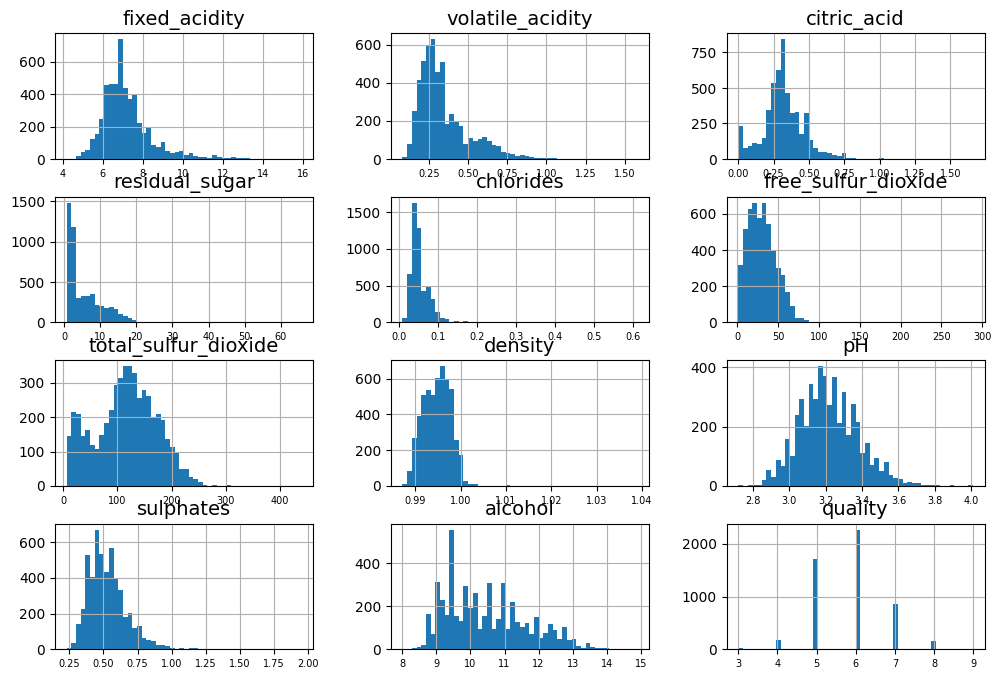

In [10]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=10)

train_set.hist(bins=50, figsize=(12, 8))
plt.show()

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.213232     0.320241   
volatile_acidity           0.213232          1.000000    -0.386739   
citric_acid                0.320241         -0.386739     1.000000   
residual_sugar            -0.114706         -0.195898     0.145705   
chlorides                  0.301359          0.370029     0.027821   
free_sulfur_dioxide       -0.277561         -0.350770     0.143727   
total_sulfur_dioxide      -0.331733         -0.418166     0.209140   
density                    0.455422          0.273210     0.094220   
pH                        -0.244918          0.277478    -0.327543   
sulphates                  0.296126          0.223653     0.051025   
alcohol                   -0.097469         -0.038144    -0.015436   
quality                   -0.087008         -0.269667     0.079828   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

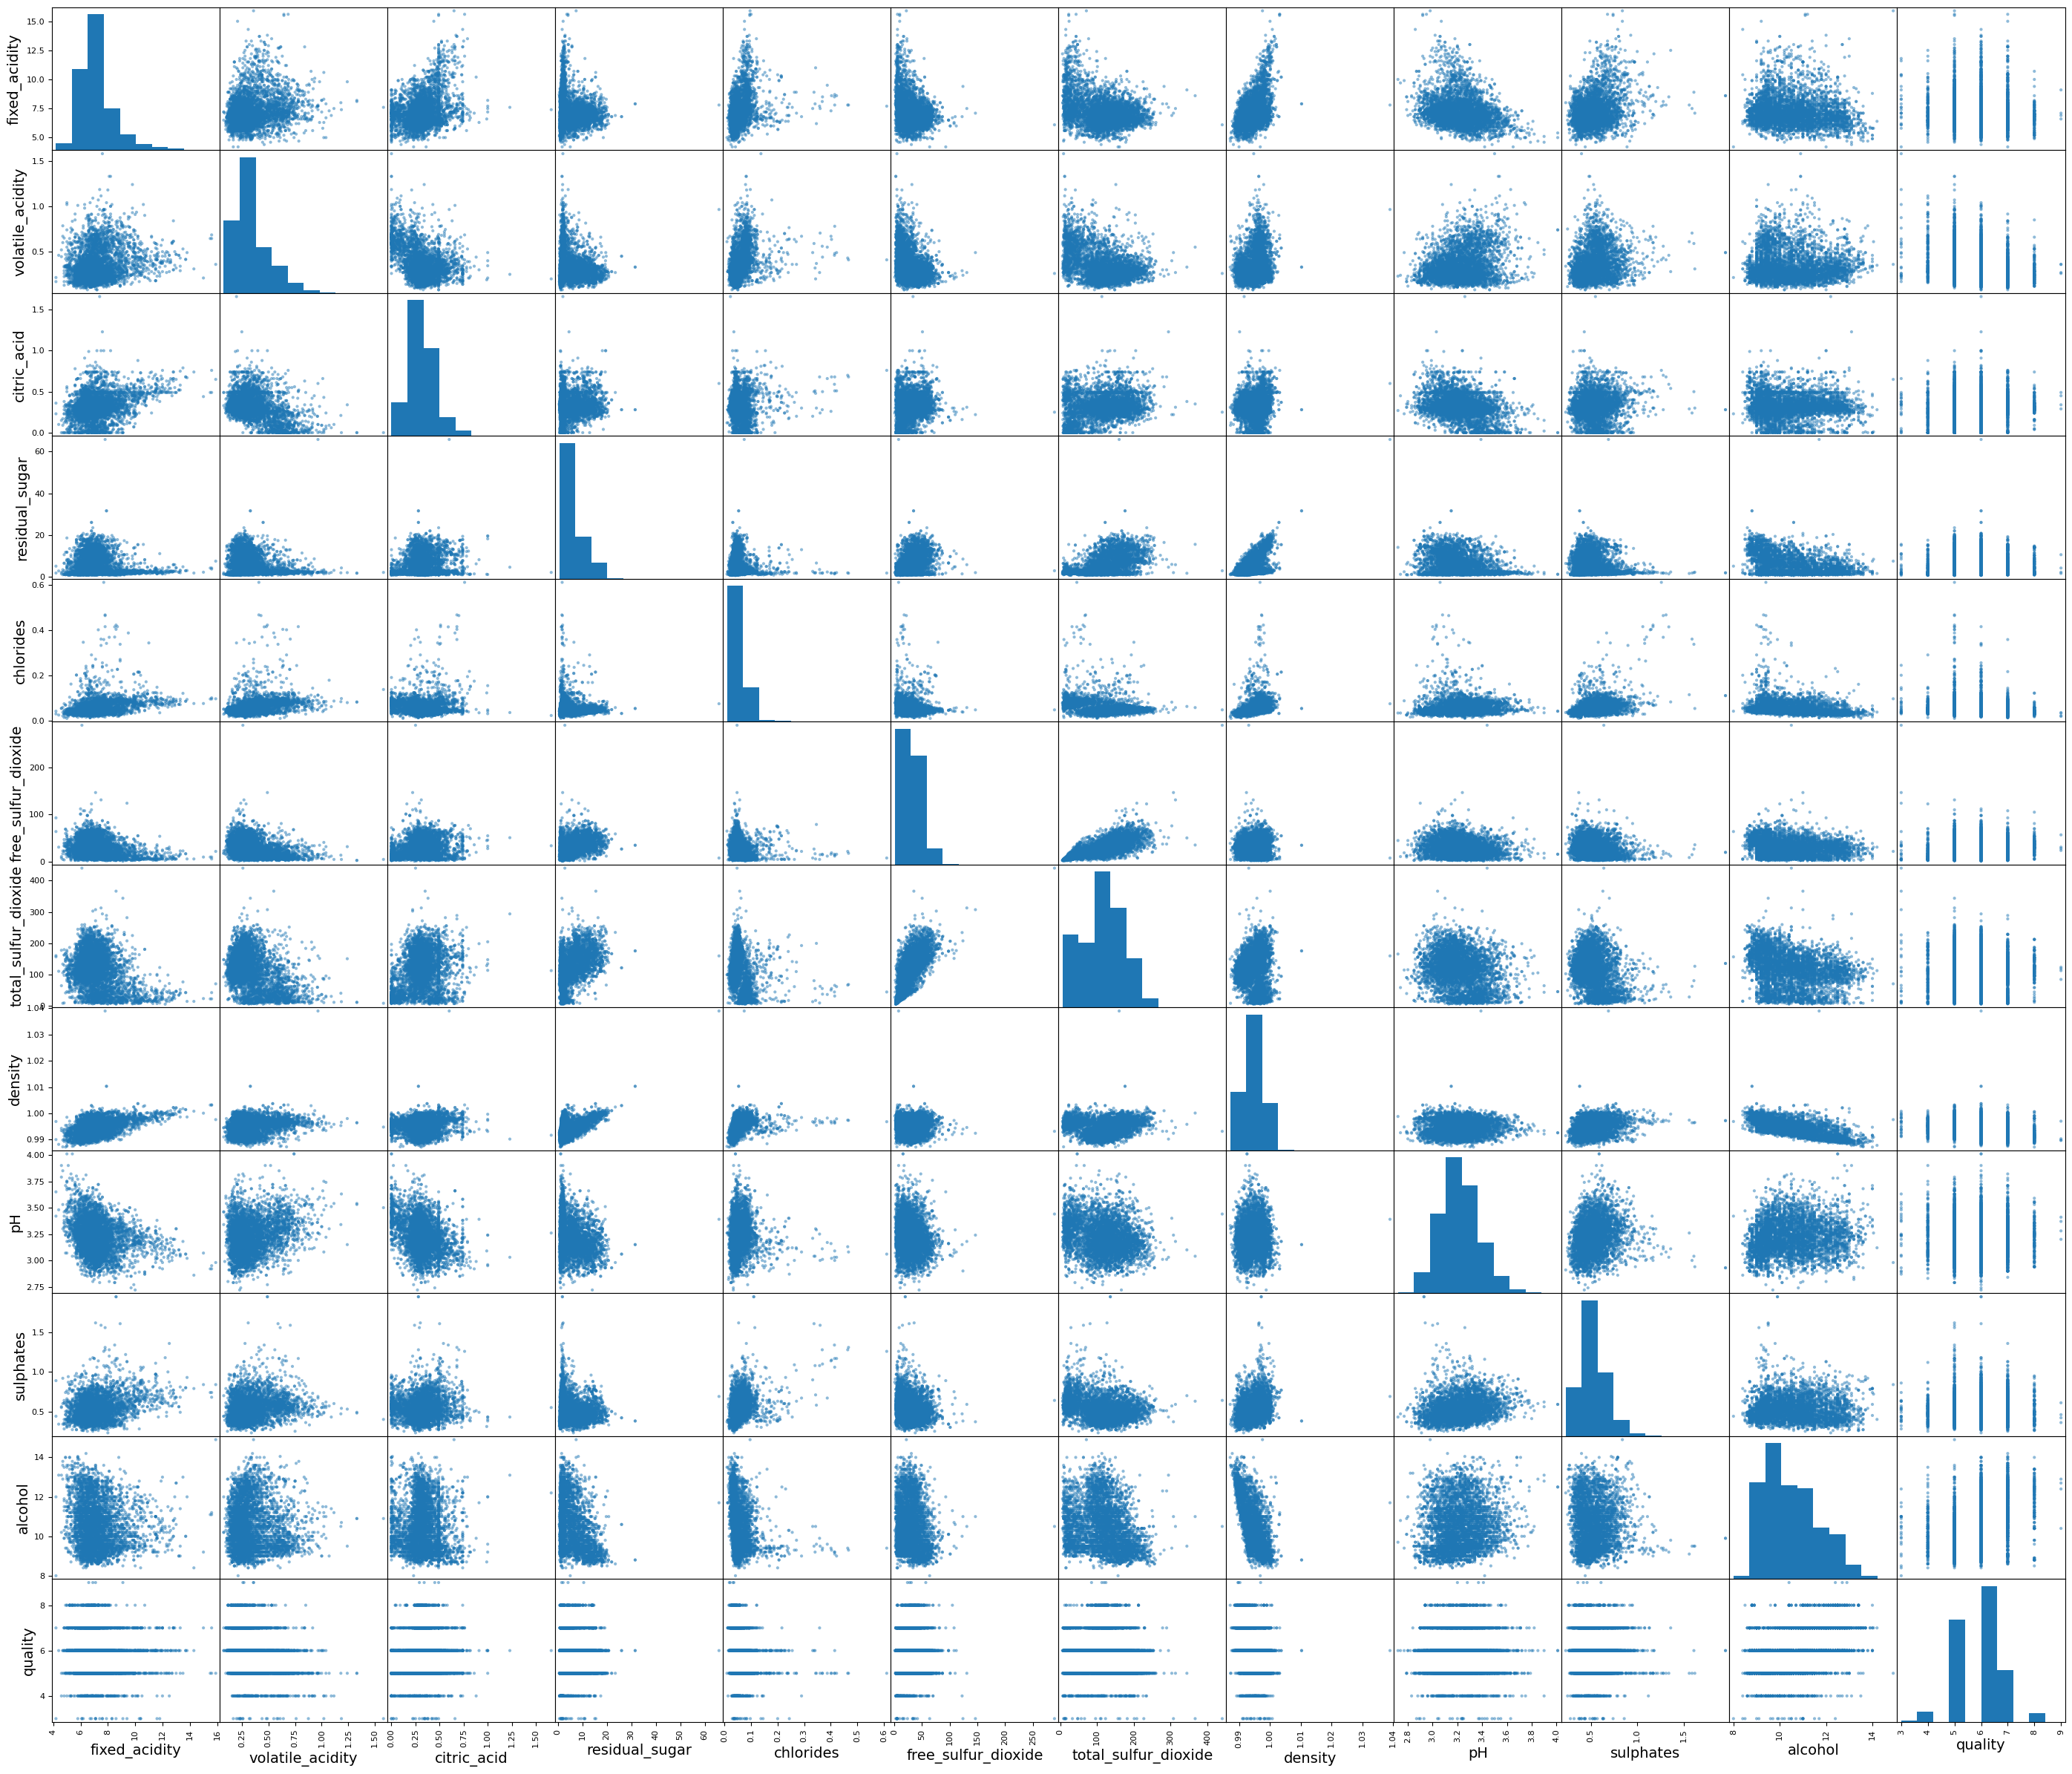

In [11]:
columns = ['citric_acid', 'quality']

corr_matrix = train_set.corr(numeric_only=True)
print(corr_matrix)

from pandas.plotting import scatter_matrix
scatter_matrix(train_set, figsize=(35, 30))
plt.show()

#no relevant correlations to do with citric acid

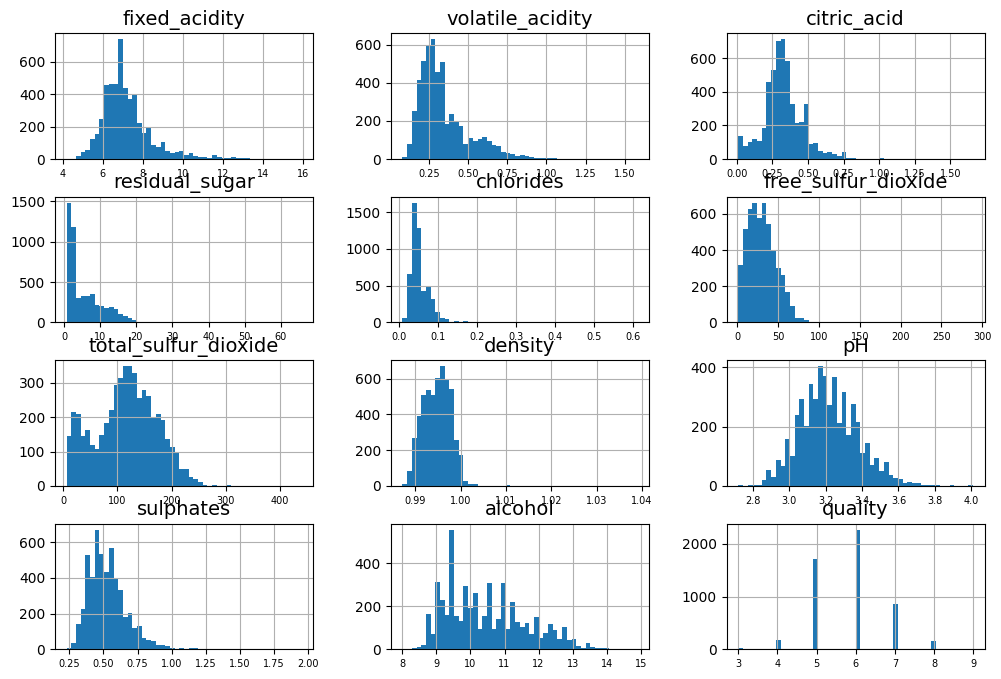

In [12]:
mask = (train_set['citric_acid'] == 0) #missing values
train_set.loc[mask, 'citric_acid'] = train_set['citric_acid'].mean() #set it with the mean

#IMPORTANT! DO the same to test set --> but with mean from train_set!!!!!!!
mask = (test_set['citric_acid'] == 0) #missing values
test_set.loc[mask, 'citric_acid'] = train_set['citric_acid'].mean() #set it with the mean

import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=10)

train_set.hist(bins=50, figsize=(12, 8))
plt.show()

In [13]:
train_set.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.220906,0.339995,0.325878,5.475861,0.055963,30.547912,115.964018,0.994741,3.218742,0.531728,10.475463,5.818164
std,1.286161,0.165761,0.137619,4.785528,0.034500,17.647040,56.738370,0.003011,0.160710,0.146772,1.188869,0.873126
min,4.200000,0.080000,0.010000,0.600000,0.009000,1.000000,6.000000,0.987130,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.318164,3.000000,0.047000,29.000000,118.000000,0.994940,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.950000,14.900000,9.000000


### 3.2. Data cleaning

- Handle missing values, duplicates, and outliers.

In [14]:
# Your code goes here

# Check drop_duplicates() function from pandas
# df.fillna(...)

print(train_set.shape)
print(train_set.duplicated().sum()) #there were 793 duplicates

train_set.drop_duplicates(inplace=True)

(5197, 12)
793


In [15]:
train_set.shape

(4404, 12)

### 3.3. Feature Engineering

- Create new features (if you consider they might be useful) given the existing ones.
- Encode categorical variables (if any)
- Transform numerical features so that they have similar scales

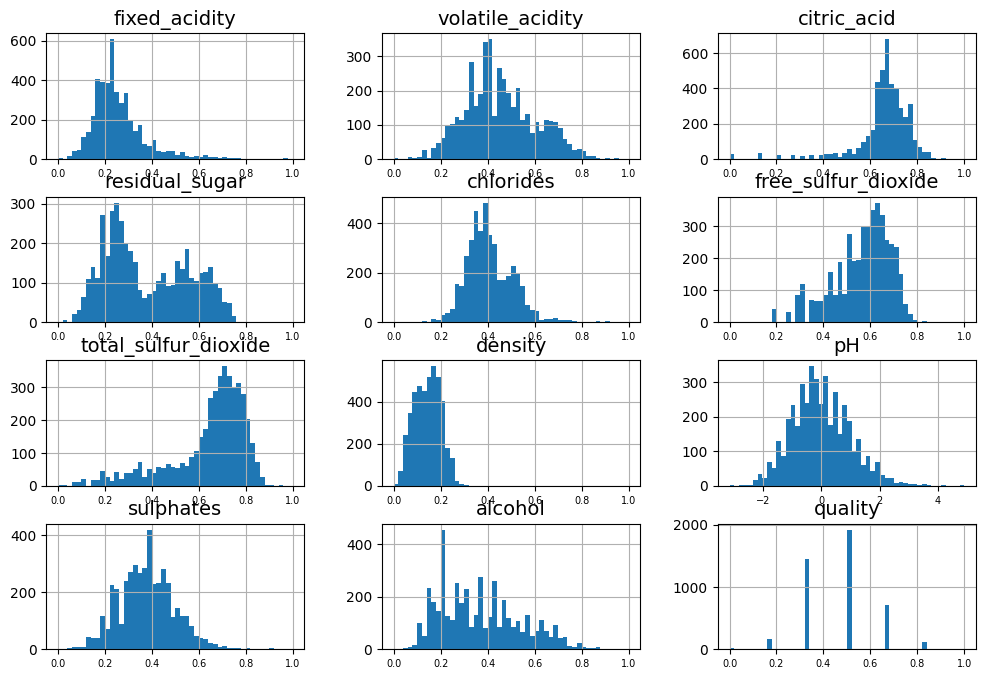

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')


In [16]:
#Transform variables
#log vs minmax vs gaussian

#My Choice
#1. Some stuff is skewed --> quantities have a tail with outliers --> do log
#2. pH--> clearly Gaussian and no problem with 0 --> do standard scaler
#3. rest (including output) should be positive within 0 and 1 --> MinMax

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

std_scaler = StandardScaler() #around 0, std=1 by default
min_max_scaler = MinMaxScaler() #0 to 1 by default

#🔒 Key point:
#Call fit() only on train_df
#Call transform() on both train and test

#1. Log residual sugar
log_cols = ['volatile_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulphates', 'citric_acid']
train_set_scaled[log_cols] = np.log(train_set_scaled[log_cols])
test_set_scaled[log_cols] = np.log(test_set_scaled[log_cols])
#plt.hist(train_set_scaled['citric_acid'], bins=100)

#2. pH
gaussian_cols = ['pH']
std_scaler.fit(train_set_scaled[gaussian_cols])
train_set_scaled[gaussian_cols] = std_scaler.transform(train_set_scaled[gaussian_cols])
test_set_scaled[gaussian_cols] = std_scaler.transform(test_set_scaled[gaussian_cols])

#3. rest
other_cols = train_set_scaled.columns.drop(gaussian_cols+['quality'])
min_max_scaler.fit(train_set_scaled[other_cols])
train_set_scaled[other_cols] = min_max_scaler.transform(train_set_scaled[other_cols])
test_set_scaled[other_cols] = min_max_scaler.transform(test_set_scaled[other_cols])

#4. Output -> to reverse after
quality_col = ['quality']
min_max_quality_scaler = MinMaxScaler()
min_max_quality_scaler.fit(train_set_scaled[quality_col])
train_set_scaled[quality_col] = min_max_quality_scaler.transform(train_set_scaled[quality_col])
test_set_scaled[quality_col] = min_max_quality_scaler.transform(test_set_scaled[quality_col])

#Check!
train_set_scaled.hist(bins=50, figsize=(12, 8))
plt.show()
print(other_cols)


In [17]:
train_set_scaled.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4404.000000,4.404000e+03,4404.000000,4404.000000,4404.000000
mean,0.258618,0.454105,0.656878,0.378823,0.409046,0.564634,0.641248,0.143858,1.439156e-15,0.378197,0.366574,0.466621
std,0.112315,0.148959,0.119280,0.179461,0.103690,0.122902,0.168276,0.057506,1.000114e+00,0.119524,0.171195,0.146358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.142420e+00,0.000000,0.000000,0.000000
25%,0.188034,0.354005,0.629672,0.233874,0.341490,0.500000,0.588060,0.099711,-7.097706e-01,0.292727,0.217391,0.333333
50%,0.239316,0.431709,0.676837,0.320190,0.391885,0.588061,0.689597,0.146770,-8.601435e-02,0.372552,0.347826,0.500000
75%,0.299145,0.547786,0.721614,0.540501,0.472378,0.655364,0.755572,0.186500,6.001176e-01,0.448584,0.478261,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.904036e+00,1.000000,1.000000,1.000000


## 4. Training

### 4.1. Define Features and Target

- Define X (features) and y (target)

In [18]:
#I'm gonna do regression I think -> Yep it's my task

y = train_set_scaled['quality']
X = train_set_scaled.drop(['quality'], axis=1)

y_rescaled = min_max_quality_scaler.inverse_transform(y.to_numpy().reshape(-1, 1)) # y values should not be normalized
# print("y= ", y)
# print("y_rescaled= ", y_rescaled)


### 4.2. Train your model and evaluate it using Cross-validation

- Import the models that you want to use from sklearn.
- Choose some metrics that will let you know how the models are performing.
- Use cross-validation to validate them and compare their performances. Choose the best one.
- (Optional) Perform a hyperparameter search to improve the training of the model.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, RegressorMixin

#Models: LinReg, Ridge
#Metrics: MSE, misclassification error

lin_reg = LinearRegression()
quad_reg_raw = PolynomialFeatures(degree=2)
quad_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
ter_reg = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

lin_results_mse = cross_validate(lin_reg, X, y, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True) # -MSE
#print(lin_results) #I mean, there is no parameter search at all

quad_raw_results_mse = cross_validate(quad_reg, X, y, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True) # -MSE

quad_results_mse = cross_validate(quad_reg, X, y, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True) # -MSE
#print(quad_results) #I mean, there is no parameter search at all

ter_results_mse = cross_validate(ter_reg, X, y, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True) # -MSE
#print(ter_results) #I mean, there is no parameter search at all

print('For linear, mean train MSE = ', -lin_results_mse['train_score'].mean(), '\tmean validation MSE = ', -lin_results_mse['test_score'].mean())
print('For quadratic_raw, mean train MSE = ', -quad_raw_results_mse['train_score'].mean(), '\tmean validation MSE = ', -quad_raw_results_mse['test_score'].mean())
print('For quadratic, mean train MSE = ', -quad_results_mse['train_score'].mean(), '\tmean validation MSE = ', -quad_results_mse['test_score'].mean())
print('For 3-order, mean train MSE = ', -ter_results_mse['train_score'].mean(), '\tmean validation MSE = ', -ter_results_mse['test_score'].mean())

#Quadratic wins
best_quad_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
best_quad_reg.fit(X,y)



For linear, mean train MSE =  0.014532511500284243 	mean validation MSE =  0.014666596075869787
For quadratic_raw, mean train MSE =  0.013142577312247513 	mean validation MSE =  0.01389723119438708
For quadratic, mean train MSE =  0.013142577312247513 	mean validation MSE =  0.01389723119438708
For 3-order, mean train MSE =  0.01135366846204996 	mean validation MSE =  0.0344321964215499


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

## 5. Evaluate on test set

- Clean and do feature engineering process on test set.
- See how the model performs on the test set.

In [29]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
6400,0.188034,0.091156,0.658706,0.129035,0.321993,0.667826,0.733381,0.082739,-0.335517,0.407877,0.391304
3310,0.239316,0.307155,0.665338,0.493697,0.335167,0.606023,0.697490,0.130569,0.101113,0.372552,0.405797
1483,0.333333,0.475023,0.740258,0.195061,0.365219,0.316206,0.161384,0.159884,0.787244,0.456317,0.391304
1492,0.170940,0.702259,0.350502,0.208801,0.406555,0.316206,0.255788,0.122469,2.159508,0.399292,0.572464
4841,0.239316,0.431709,0.695492,0.180374,0.328671,0.659617,0.675105,0.078303,0.537742,0.463924,0.521739
...,...,...,...,...,...,...,...,...,...,...,...
3493,0.222222,0.494747,0.740258,0.507218,0.433424,0.606023,0.765922,0.155641,-0.522644,0.303482,0.217391
6008,0.179487,0.431709,0.658706,0.362910,0.335167,0.611626,0.733381,0.045709,-0.335517,0.209602,0.695652
2887,0.256410,0.464708,0.683982,0.180374,0.277408,0.594254,0.675105,0.059209,-0.460268,0.372552,0.695652
3861,0.367521,0.381956,0.671752,0.327933,0.300747,0.423176,0.539955,0.091803,-1.021649,0.303482,0.507246


Final MSE error:  0.5008594912368523
Final misclassification error:  0.48615384615384616


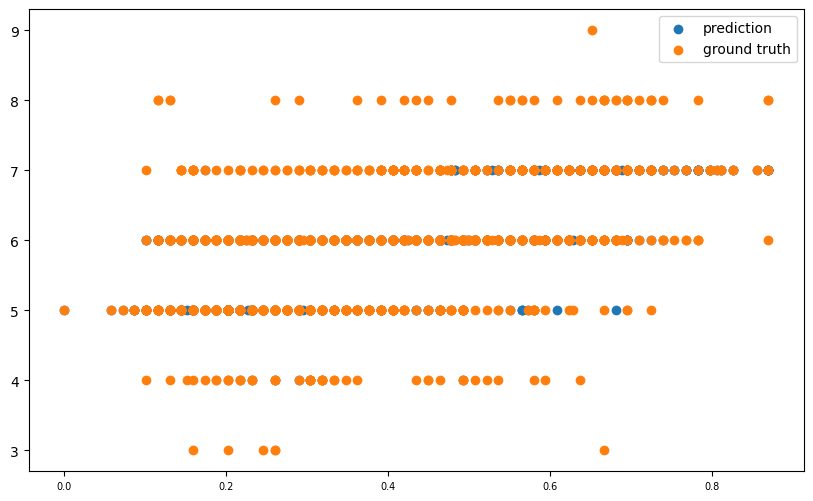

In [32]:
y_test = test_set_scaled['quality']
X_test = test_set_scaled.drop(['quality'], axis=1)

y_test_rescaled = min_max_quality_scaler.inverse_transform(y_test.to_numpy().reshape(-1, 1))
#print(y_test_rescaled)

y_pred = best_quad_reg.predict(X_test)
y_pred_rescaled = min_max_quality_scaler.inverse_transform(y_pred.reshape(-1, 1))
#print(y_pred_rescaled)

y_test_rescaled_rounded = np.round(y_test_rescaled)
y_pred_rescaled_rounded = np.round(y_pred_rescaled)
#print(y_pred_rescaled_rounded)

print('Final MSE error: ', mean_squared_error(y_test_rescaled, y_pred_rescaled))
print('Final misclassification error: ',  np.mean( y_test_rescaled==y_pred_rescaled_rounded)  )


# Visual
plt.rc('font', size=10); plt.rc('legend', fontsize=10)
plt.figure(figsize = (10,6))
plt.scatter(X_test['alcohol'], y_pred_rescaled_rounded, label='prediction')
plt.scatter(X_test['alcohol'], y_test_rescaled, label='ground truth')
plt.legend()



In [47]:
np.unique(y_test_rescaled_rounded)

array([3., 4., 5., 6., 7., 8., 9.])

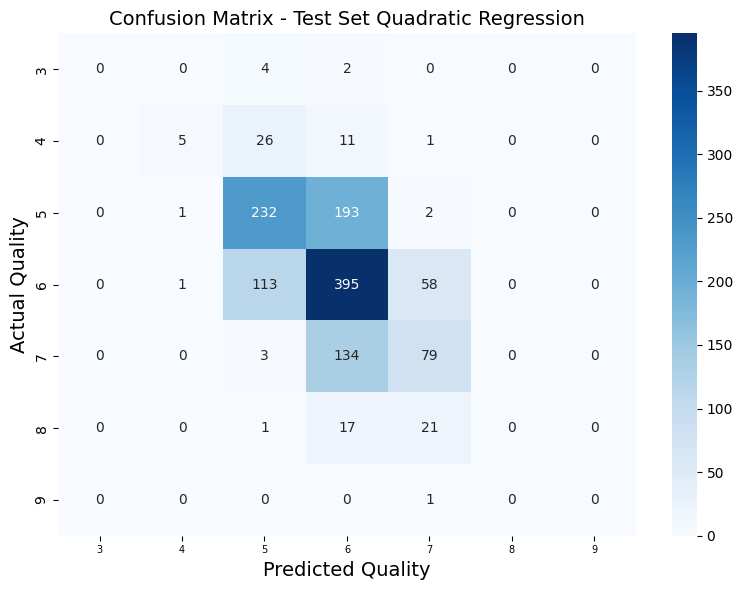

Accuracy:  0.546923076923077


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_rescaled_rounded, y_pred_rescaled_rounded)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(np.unique(y_test_rescaled_rounded).astype(int)), 
            yticklabels=sorted(np.unique(y_test_rescaled_rounded).astype(int)))
plt.title(f'Confusion Matrix - Test Set Quadratic Regression')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.tight_layout()
plt.show()

# Accuracy
accuracy = accuracy_score(y_test_rescaled_rounded, y_pred_rescaled_rounded)
print("Accuracy: ", accuracy)


## 6. Conclusions and future work

The regression model improved the accuracy!! From 0.457 to 0.547!! Our initial hipothesis thus, was right.

Need NN with regularization clearly!